# Géocoder un fichier d'usine (anonymisé)

## Setting of the environnement
Importer les librairies

Les installer si nécessaire : 
`C:\Tools\Python\python310\python -m pip install geopy`

In [6]:
from geopy.geocoders import Nominatim
import pandas as pd

## Ouvrir les données

In [8]:
with open(r"C:\Travail\Enseignement\Cours_M2_python\2025\dev\geocodage\Usine complet_anonyme_Papa OUMAR NDIAYE_QBANo_c.csv", encoding="utf-8") as f:
    # Lecture des données avec la fonction 'read_csv'
    df = pd.read_csv(f, sep=';', decimal=',')
df.shape  
df.head()
  

,code_usine,Adresse,Code postal INSEE,Complet
0,1,D3,86009,"D3,86009"
1,2,La Tricherie,86019,"La Tricherie,86019"
2,3,11 route de Chatin,86061,"11 route de Chatin,86061"
3,4,1 rue de bancs,86061,"1 rue de bancs,86061"
4,5,Rue Leclanché,86062,"Rue Leclanché ,86062"


In [31]:
with open(r"C:\Travail\Enseignement\Cours_M2_python\2025\dev\geocodage\Usine complet_anonyme.xlsx", 'rb') as f:
    # Lecture des données avec la fonction 'read_excel'
    df = pd.read_excel(f, sheet_name='Feuil1')
df.shape  
df.head()

print(df.columns)

Index(['code_usine', 'Adresse  ', 'Code postal INSEE'], dtype='object')


### ouvrir la base postale 
Objectif : joindre les code INSEE commune avec les codes postaux INSEE du fichier des usines pour récupérer le vrai code postal et geocoder en donnant le code postal (plus précis)

In [ ]:
with open(r"C:\Travail\Enseignement\Cours_M2_python\2025\dev\geocodage\019HexaSmal.csv", encoding="latin1") as f:
    # Lecture des données avec la fonction 'read_csv'
    laposte = pd.read_csv(f, sep=';')
print(laposte.shape) #(39193, 5)
laposte.head()

(39193, 5)


,#Code_commune_INSEE,Nom_de_la_commune,Code_postal,Libellé_d_acheminement,Ligne_5
0,01001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN
1,01002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN
2,01004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN
3,01005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN
4,01006,AMBLEON,1300,AMBLEON,NaN


## Tester le géocodeur Nominatim

Go on Web site : [https://operations.osmfoundation.org/policies/nominatim/](https://operations.osmfoundation.org/policies/nominatim/)

Read with caution usage conditions
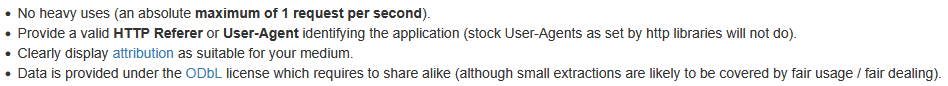

J'introduis l'usage de fonctions : 
def nom_de_fonction(param1="adresse à géolocaliser")


In [ ]:
def test_une_adresse(adress="175 5th Avenue NYC"):
    
    #https://operations.osmfoundation.org/policies/nominatim/
    #Read with caution usage conditions
    geolocator = Nominatim(user_agent="test_anonyme_2025")
    location = geolocator.geocode(adress)
    
    if location is not None:
        #print(location.address)
        #Flatiron Building, 175, 5th Avenue, Flatiron, New York, NYC, New York, ...
        
        print((location.latitude, location.longitude))
        #(40.7410861, -73.9896297241625)
    
        print(location.raw)
        return location.raw
    else:
        return None

Utiliser la fonction pour une adresse test :

In [10]:
test_une_adresse()


(40.7410592, -73.9896416)
{'place_id': 405669729, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 264768896, 'lat': '40.7410592', 'lon': '-73.9896416', 'class': 'building', 'type': 'office', 'place_rank': 30, 'importance': 9.175936522464359e-05, 'addresstype': 'building', 'name': 'Flatiron Building', 'display_name': 'Flatiron Building, 175, 5th Avenue, Flatiron District, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10010, United States', 'boundingbox': ['40.7407596', '40.7413004', '-73.9898715', '-73.9895014']}


{'place_id': 405669729,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 264768896,
 'lat': '40.7410592',
 'lon': '-73.9896416',
 'class': 'building',
 'type': 'office',
 'place_rank': 30,
 'importance': 9.175936522464359e-05,
 'addresstype': 'building',
 'name': 'Flatiron Building',
 'display_name': 'Flatiron Building, 175, 5th Avenue, Flatiron District, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10010, United States',
 'boundingbox': ['40.7407596', '40.7413004', '-73.9898715', '-73.9895014']}

In [ ]:
test_une_adresse('11 route de Chatin,86061, France')

(47.1191595, 3.9085745)
{'place_id': 85988075, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 9368148387, 'lat': '47.1191595', 'lon': '3.9085745', 'class': 'place', 'type': 'house', 'place_rank': 30, 'importance': 6.029526207365557e-05, 'addresstype': 'place', 'name': '', 'display_name': '11, Route de Chatîn, Vissingy, Chaumard, Château-Chinon (Ville), Nièvre, Bourgogne-Franche-Comté, France métropolitaine, 58120, France', 'boundingbox': ['47.1191095', '47.1192095', '3.9085245', '3.9086245']}


{'place_id': 85988075,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 9368148387,
 'lat': '47.1191595',
 'lon': '3.9085745',
 'class': 'place',
 'type': 'house',
 'place_rank': 30,
 'importance': 6.029526207365557e-05,
 'addresstype': 'place',
 'name': '',
 'display_name': '11, Route de Chatîn, Vissingy, Chaumard, Château-Chinon (Ville), Nièvre, Bourgogne-Franche-Comté, France métropolitaine, 58120, France',
 'boundingbox': ['47.1191095', '47.1192095', '3.9085245', '3.9086245']}

In [13]:
test_une_adresse('Rue Leclanché ,86062, France')

(46.653401, 0.3772014)
{'place_id': 86440645, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 56248407, 'lat': '46.6534010', 'lon': '0.3772014', 'class': 'highway', 'type': 'residential', 'place_rank': 26, 'importance': 0.05340342030975811, 'addresstype': 'road', 'name': 'Rue Leclanché', 'display_name': 'Rue Leclanché, Chasseneuil-du-Poitou, Poitiers, Vienne, Nouvelle-Aquitaine, France métropolitaine, 86360, France', 'boundingbox': ['46.6513475', '46.6557032', '0.3757491', '0.3782345']}


{'place_id': 86440645,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 56248407,
 'lat': '46.6534010',
 'lon': '0.3772014',
 'class': 'highway',
 'type': 'residential',
 'place_rank': 26,
 'importance': 0.05340342030975811,
 'addresstype': 'road',
 'name': 'Rue Leclanché',
 'display_name': 'Rue Leclanché, Chasseneuil-du-Poitou, Poitiers, Vienne, Nouvelle-Aquitaine, France métropolitaine, 86360, France',
 'boundingbox': ['46.6513475', '46.6557032', '0.3757491', '0.3782345']}

## Geocoder toutes les adresses si possible

In [ ]:
import time

data = []
failed = list()   


i = 0
for index, row in df.iterrows():
    print(str(i) + "-------------------------")
    if i  == 5:
        print("On est à la ligne : "+str(i))
        break
    #code_usine;Adresse  ;Code postal INSEE;Complet
    adresse = row['Adresse  ']+','+str(row['Code postal INSEE'])+', '+'France'
    print(adresse)
    location = test_une_adresse(adresse)
    #print(location["lat"])
    #print(location["lon"])
    #print(location["display_name"])
    #print(location["type"])
    #print(location["importance"])
    
    i = i+1
    time.sleep(1.2) #IMPORTANT

    if location is not None:
        # initialize list of lists
        infos = [row.code_usine, location["lat"], location["lon"], location["display_name"], location["type"], location["importance"]]
        data.append(infos)
        
    else:
        failed.append(row.code_usine)

# Create the pandas DataFrame
resultat = pd.DataFrame(data, columns=['code_usine', 'lat', 'lon', 'display_name', 'type', 'importance'])

#HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Route+de+Saint-Georges%2C86062%2C+France&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


0-------------------------
On est à la ligne : 0
D3,86009, France
(47.3061212, -1.9674795)
{'place_id': 403995119, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 1376157803, 'lat': '47.3061212', 'lon': '-1.9674795', 'class': 'highway', 'type': 'residential', 'place_rank': 26, 'importance': 0.0533915747310597, 'addresstype': 'road', 'name': 'Rue du Port', 'display_name': 'Rue du Port, Lavau-sur-Loire, Saint-Nazaire, Loire-Atlantique, Pays de la Loire, France métropolitaine, 44260, France', 'boundingbox': ['47.3060886', '47.3061539', '-1.9675164', '-1.9674426']}
1-------------------------
La Tricherie,86019, France
(46.7288137, 0.4412383)
{'place_id': 418981398, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 249333739, 'lat': '46.7288137', 'lon': '0.4412383', 'class': 'railway', 'type': 'halt', 'place_rank': 30, 'importance': 0.19320077280132728, 'addressty

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Route+de+Saint-Georges%2C86062%2C+France&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

## Sauver les résultats dans un fichier

In [35]:
resultat.head(10)

,code_usine,lat,lon,display_name,type,importance,geometry
0,1,47.3061212,-1.9674795,"Rue du Port, Lavau-sur-Loire, Saint-Nazaire, L...",residential,0.053392,POINT (-1.96748 47.30612)
1,2,46.7288137,0.4412383,"La Tricherie, Rue de la Gare, La Tricherie, Be...",halt,0.193201,POINT (0.44124 46.72881)
2,3,47.1191595,3.9085745,"11, Route de Chatîn, Vissingy, Chaumard, Châte...",house,0.000060,POINT (3.90857 47.11916)
3,4,49.9082877,1.0208019,"1, Rue Georges de Porto Riche, Mordal, Varenge...",house,0.000066,POINT (1.02080 49.90829)
4,5,46.6534010,0.3772014,"Rue Leclanché, Chasseneuil-du-Poitou, Poitiers...",residential,0.053403,POINT (0.37720 46.65340)


In [36]:
# Export en csv
from datetime import date
today = date.today().strftime("%Y-%m-%d")
resultat.to_csv('{0}_usines_adresses.csv'.format(today), index=False, sep=';', decimal=',', encoding='utf-8')

#Liste des usines non géocodées
print(failed)

[]


### Convert into a geopandas dataframe and export geojson file

In [37]:
import geopandas

gdf = geopandas.GeoDataFrame(
    resultat, geometry=geopandas.points_from_xy(resultat.lon, resultat.lat), crs="EPSG:4326"
)
gdf.head()


,code_usine,lat,lon,display_name,type,importance,geometry
0,1,47.3061212,-1.9674795,"Rue du Port, Lavau-sur-Loire, Saint-Nazaire, L...",residential,0.053392,POINT (-1.96748 47.30612)
1,2,46.7288137,0.4412383,"La Tricherie, Rue de la Gare, La Tricherie, Be...",halt,0.193201,POINT (0.44124 46.72881)
2,3,47.1191595,3.9085745,"11, Route de Chatîn, Vissingy, Chaumard, Châte...",house,0.000060,POINT (3.90857 47.11916)
3,4,49.9082877,1.0208019,"1, Rue Georges de Porto Riche, Mordal, Varenge...",house,0.000066,POINT (1.02080 49.90829)
4,5,46.6534010,0.3772014,"Rue Leclanché, Chasseneuil-du-Poitou, Poitiers...",residential,0.053403,POINT (0.37720 46.65340)


In [38]:

#Export en geojson  
geojsonfile = 'usines_adresses.geojson'  

#gdf.to_json(geojsonfile)
gdf.to_file(geojsonfile, driver='GeoJSON') 
    
gdf.envelope   

0    POINT (-1.96748 47.30612)
1     POINT (0.44124 46.72881)
2     POINT (3.90857 47.11916)
3     POINT (1.02080 49.90829)
4     POINT (0.37720 46.65340)
dtype: geometry